In [9]:
# Instala as dependências
#!pip install tweepy
#!pip install textblob

     -------------------------------------- 636.8/636.8 kB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 9.4 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 kB ? eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB ? eta 0:00:00
     -------------------------------------- 268.0/268.0 kB 8.1 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 9.0 MB/s eta 0:00:00


In [1]:
import tweepy
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# lê as credenciais de login do Twitter
with open("login.txt", "r") as file:
    consumer_key=file.readline().strip("\n")
    consumer_secret=file.readline().strip("\n")
    bearer_token=file.readline().strip("\n")
    access_token=file.readline().strip("\n")
    access_token_secret=file.readline().strip("\n")

In [3]:
# faz autenticação
client = tweepy.Client(
    bearer_token
)

In [10]:
bill_gates = 50393960

# Pega os 5 primeiros tweets do Bill Gates
response = client.get_users_tweets(id=bill_gates)
tweets = response.data

print("Mostra os 5 primeiros tweets")
for count, tweet in enumerate(tweets[:5]):
    print(f"{count + 1}) {tweet.text}\n")

Mostra os 5 primeiros tweets
1) Leaders like @wiiiiza make me optimistic for our future. Earlier this year, I had the opportunity to meet Farwiza and was so impressed by her work protecting the Leuser ecosystem in Indonesia. https://t.co/hKYXdnPbcm

2) Thanks for bringing levity to such a serious issue yesterday, @kalpenn. I learned a lot from @noupside and @govindethiraj about how we can be better consumers of information and rebuild trust in institutions. https://t.co/ebgmpwbZJU

3) @UlrichJvV @gatesfoundation @GatesAfrica I think everyone was thankful I wasn't the lead chef. I'll be thinking of @ChefPierreThiam's salad and conversation for days.

4) RT @gatesfoundation: In a historic show of global solidarity, donors raised over $14.25 billion for the @GlobalFund. 
 
These funds will sp…

5) RT @gatesfoundation: .@billgates has the juice. #corn #Goalkeepers2030 https://t.co/FDpvXD7dI8



In [8]:
# cria um dataframe com coluna 'Tweets'
df = pd.DataFrame([i.text for i in tweets], columns=["Tweets"])

# mostra o Dataframe
df.head()

,Tweets
0,Leaders like @wiiiiza make me optimistic for o...
1,Thanks for bringing levity to such a serious i...
2,@UlrichJvV @gatesfoundation @GatesAfrica I thi...
3,RT @gatesfoundation: In a historic show of glo...
4,RT @gatesfoundation: .@billgates has the juice...


In [9]:
# Limpa o texto 
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # removed mentions
    text = re.sub(r'#', '', text) # remove the symbol '#'
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text) # remove the hyper link
    return text

# aplica a função no dataframe
df['Tweets'] = df['Tweets'].apply(cleanText)

# mostra o df
df

,Tweets
0,Leaders like make me optimistic for our futur...
1,Thanks for bringing levity to such a serious i...
2,I think everyone was thankful I wasn't the ...
3,": In a historic show of global solidarity, don..."
4,: . has the juice. corn Goalkeepers2030
5,: Inspiring to hear President speak so compel...
6,"Goalkeepers2030 was filled with laughter, impa..."
7,"This month, we’re committing $912 million to h..."
8,I’ve long said that the is one of the kindest...
9,It was an honor to see you this morning. Suppo...


In [12]:
# pega subjectividade
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# pega a polaridade
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# cria colunas de subjetividade e polaridade no dataframe
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# mostra o df
df

,Tweets,Subjectivity,Polarity
0,Leaders like make me optimistic for our futur...,0.541667,0.333333
1,Thanks for bringing levity to such a serious i...,0.466667,0.091667
2,I think everyone was thankful I wasn't the ...,0.000000,0.000000
3,": In a historic show of global solidarity, don...",0.000000,0.000000
4,: . has the juice. corn Goalkeepers2030,0.000000,0.000000
5,: Inspiring to hear President speak so compel...,0.800000,0.400000
6,"Goalkeepers2030 was filled with laughter, impa...",0.633333,0.300000
7,"This month, we’re committing $912 million to h...",0.062500,0.000000
8,I’ve long said that the is one of the kindest...,0.440000,0.310000
9,It was an honor to see you this morning. Suppo...,0.250000,0.250000


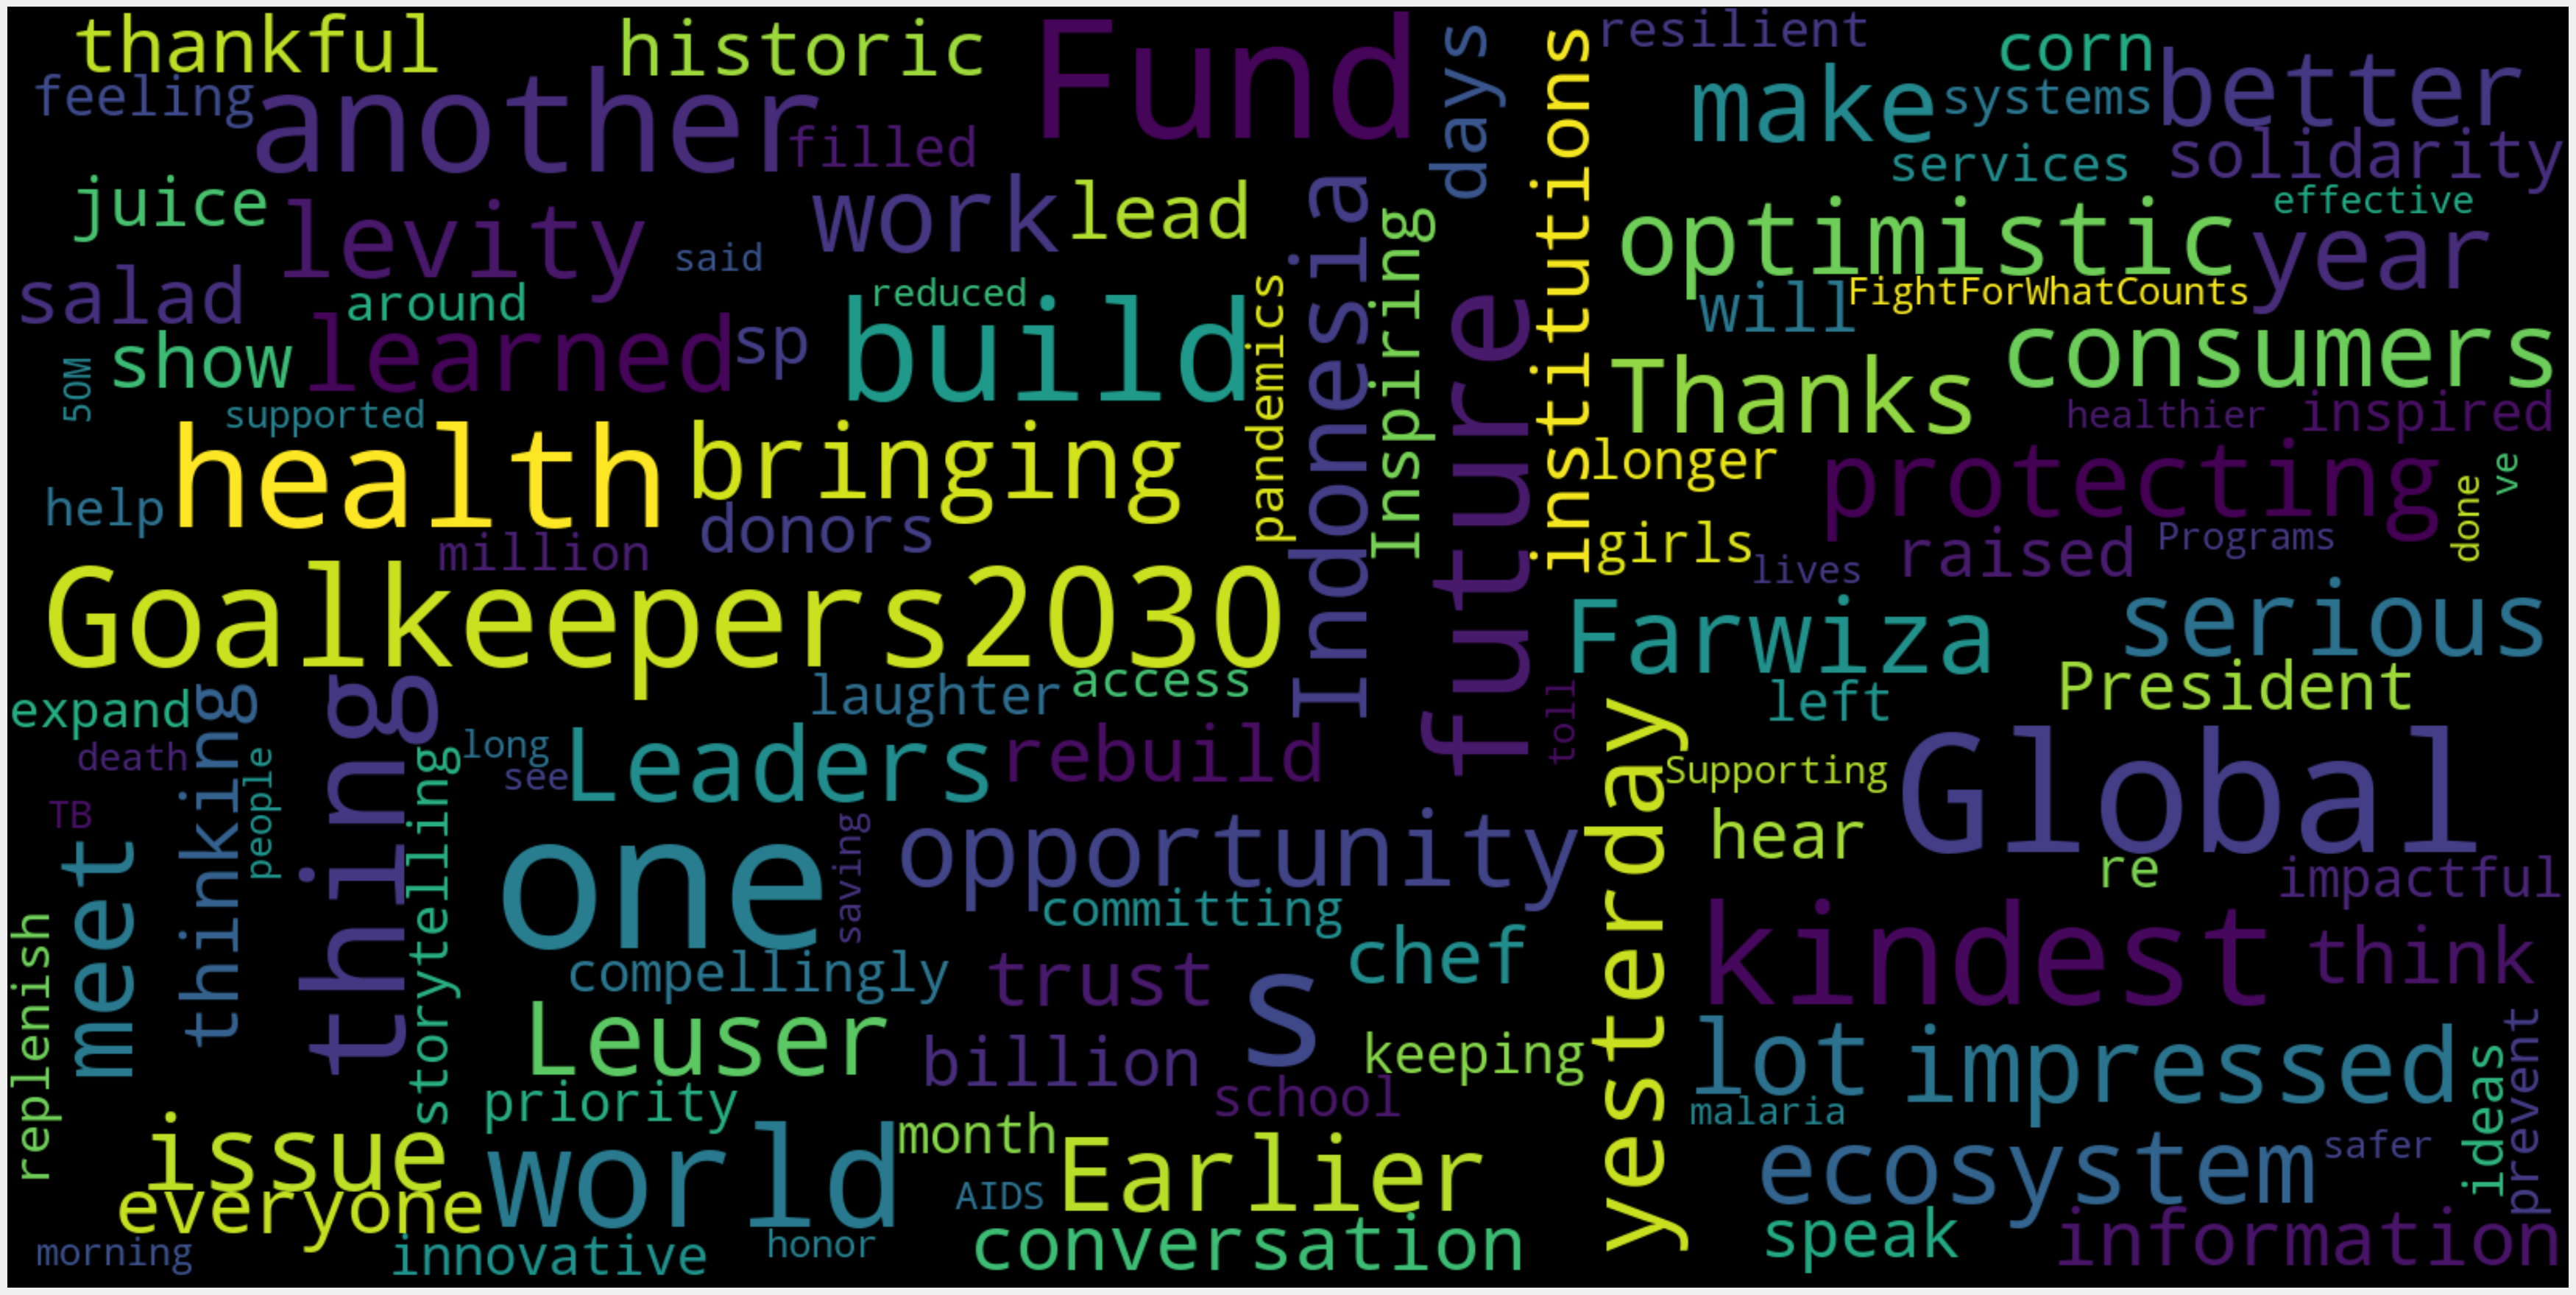

In [16]:
# cria um wordcloud
allWords = ' '.join( [twts for twts in df['Tweets']])
wordCloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=119).generate(allWords)

plt.figure(figsize=(40,30))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [17]:
# cria uma função para computar se a análise é negativa, positiva ou neutra
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

# cria coluna 'Analysis' no df
df["Analysis"] = df['Polarity'].apply(getAnalysis)

# mostra o df
df

,Tweets,Subjectivity,Polarity,Analysis
0,Leaders like make me optimistic for our futur...,0.541667,0.333333,Positive
1,Thanks for bringing levity to such a serious i...,0.466667,0.091667,Positive
2,I think everyone was thankful I wasn't the ...,0.000000,0.000000,Neutral
3,": In a historic show of global solidarity, don...",0.000000,0.000000,Neutral
4,: . has the juice. corn Goalkeepers2030,0.000000,0.000000,Neutral
5,: Inspiring to hear President speak so compel...,0.800000,0.400000,Positive
6,"Goalkeepers2030 was filled with laughter, impa...",0.633333,0.300000,Positive
7,"This month, we’re committing $912 million to h...",0.062500,0.000000,Neutral
8,I’ve long said that the is one of the kindest...,0.440000,0.310000,Positive
9,It was an honor to see you this morning. Suppo...,0.250000,0.250000,Positive


In [22]:
# mostra todos os tweets potencialmente positivos
sortedDF = df.sort_values(by=['Polarity'])

for i in range(sortedDF.shape[0]):
    if sortedDF["Analysis"][i] == "Positive":
        print(f"{i + 1}) {sortedDF['Tweets'][i]}\n")

1) Leaders like  make me optimistic for our future. Earlier this year, I had the opportunity to meet Farwiza and was so impressed by her work protecting the Leuser ecosystem in Indonesia. 

2) Thanks for bringing levity to such a serious issue yesterday, . I learned a lot from  and  about how we can be better consumers of information and rebuild trust in institutions. 

6) : Inspiring to hear President  speak so compellingly about why keeping girls in school longer is a priority in…

7) Goalkeepers2030 was filled with laughter, impactful storytelling, and innovative ideas that left me feeling inspired. 

9) I’ve long said that the  is one of the kindest things people have ever done for one another. It’s also one of the most effective. Programs supported by the Global Fund have reduced the death toll from AIDS, TB, and malaria by 50%, saving more than 50M lives.

10) It was an honor to see you this morning. Supporting  builds a healthier, safer world – it’s the kindest thing we can do f

In [25]:
# mostra os tweets potencialmente negativos
sortedDF = df.sort_values(by=['Polarity'], ascending=False)

for i in range(sortedDF.shape[0]):
    if sortedDF["Analysis"][i] == "Negative
        print(f"{i + 1}) {sortedDF['Tweets'][i]}\n")


3)    I think everyone was thankful I wasn't the lead chef. I'll be thinking of 's salad and conversation for days.

4) : In a historic show of global solidarity, donors raised over $14.25 billion for the . 
 
These funds will sp…

5) : . has the juice. corn Goalkeepers2030 

8) This month, we’re committing $912 million to help replenish the Global Fund through 2026 to expand access to health services around the world and build resilient health systems to prevent future pandemics in the FightForWhatCounts. 



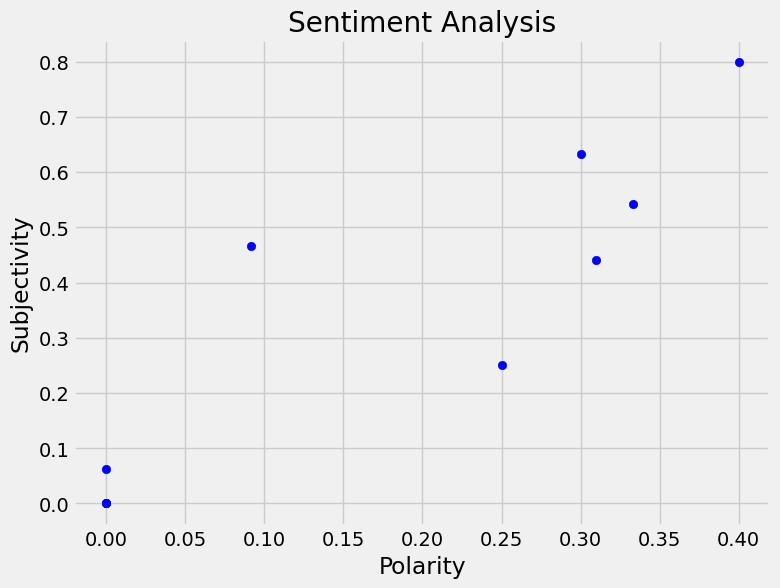

In [26]:
# traça a polaridade e subjetividade
plt.figure(figsize=(8, 6))
for i in range(df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
    
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [86]:
# Pega porcentagem dos tweets positives
def sentiment_percent(sentiment):
    ptweets = df[df.Analysis == sentiment]
    ptweets = ptweets["Tweets"]

    return round(ptweets.shape[0] / df.shape[0] * 100, 1) 

text = f"""\
tweets positivos: {sentiment_percent("Positive")}
tweets negativos: {sentiment_percent("Negative")}
tweets neutros: {sentiment_percent("Neutral")}\
"""
print(text)

tweets positivos: 60.0
tweets negativos: 0.0
tweets neutros: 40.0


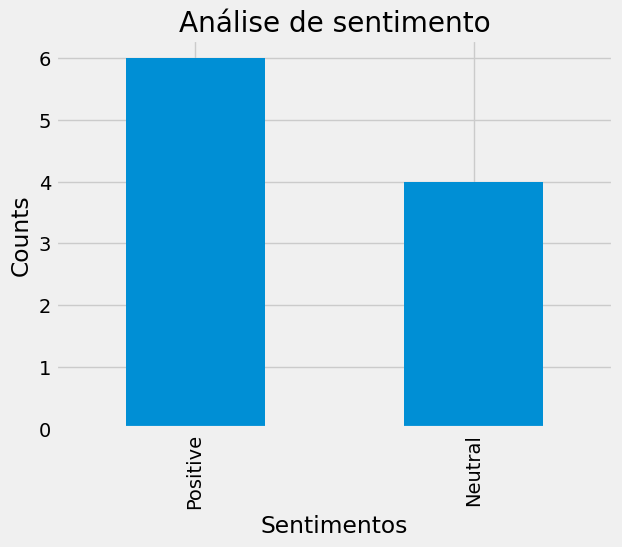

In [96]:
# traça e visualiza o gráfico
plt.title("Análise de sentimento")
plt.xlabel("Sentimentos")
plt.ylabel("Counts")
df["Analysis"].value_counts().plot(kind='bar')
plt.show()